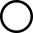

In [2]:
from IPython.display import SVG, display

# Path to your profile
svg_path = 'cross-sections/CHS33.7x2.6/profile.svg'

# Display the SVG
display(SVG(filename=svg_path))

In [1]:
import svgelements
from shapely.geometry import Polygon, MultiPolygon
from shapely.validation import make_valid


def svg_to_shapely(file_path):
    # Load the SVG and apply all transforms (translations, etc.)
    svg = svgelements.SVG.parse(file_path)

    paths = []
    for element in svg.elements():
        if isinstance(element, svgelements.Path):
            # We sample the path to get discrete points for Shapely
            # .segments() breaks the path down; we take the points
            points = []
            for segment in element.segments():
                if len(segment) >= 2:
                    # Collect the start point of each segment
                    points.append((segment.start.x, segment.start.y))

            if points:
                # Ensure it's a closed loop for the polygon
                if points[0] != points[-1]:
                    points.append(points[0])
                paths.append(points)

    if not paths:
        return None

    # Logic: The first path is the shell, any others are holes
    # This works for both the L-profile (1 path) and CHS (2 paths)
    shell = paths[0]
    holes = paths[1:]

    poly = Polygon(shell=shell, holes=holes)

    # Fix any minor self-intersections from the SVG conversion
    return make_valid(poly)

In [4]:
with open('cross-sections/L35x35x5/profile.svg', 'r') as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   width="35mm"
   height="35mm"
   viewBox="0 0 35 35"
   version="1.1"
   id="svg1"
   inkscape:version="1.4.3 (fcd0343856, 2026-01-01)"
   sodipodi:docname="profile.svg"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <sodipodi:namedview
     id="namedview1"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     inkscape:document-units="mm"
     inkscape:zoom="2.2200056"
     inkscape:cx="63.963802"
     inkscape:cy="66.891723"
     inkscape:window-width="1440"
     inkscape:window-height="831"
     inkscape:window-x="0"
     inkscape:windo

In [3]:
with open('cross-sections/CHS33.7x2.6/profile.svg', 'r') as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   width="33.700268mm"
   height="33.699753mm"
   viewBox="0 0 33.700268 33.699753"
   version="1.1"
   id="svg1"
   inkscape:version="1.4.3 (fcd0343856, 2026-01-01)"
   sodipodi:docname="profile.svg"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <sodipodi:namedview
     id="namedview1"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     inkscape:document-units="mm"
     inkscape:zoom="3.139562"
     inkscape:cx="30.258998"
     inkscape:cy="47.299591"
     inkscape:window-width="1440"
     inkscape:window-height="831"
     inkscape:windo